# Car Price Prediction Project :

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. 

# The Aim of Project:

__Build Machine learning model to how to train a car price prediction model__

---------------
# **Read Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

In [2]:
df=pd.read_csv("car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# **Data Describtion**:

| Attribute | Description |
|----------|----------|
|Car_Name	|Model of car
|Year	|Year of production of the car model
|Selling_Price	|Selling price of the car after use
|Present_Price |Car price now (not used)
|Driven_kms	|How many kilometers has the car traveled?
|Fuel_Type	|Fuel Type
|Selling_type  |Selling type (Dealer/ Individual) , Individual means buy car
|Transmission	|Transmission type
|Owner	|Number of Owner that owner car

----------------
**In this Notebook i will do:**

1)[**Understand Data and Cleaning Data**](#section10)</br>

2)[**Analysis**](#section11)</br>

3)[**Preprocessing**](#section12)</br>

4)[**Model**](#section13)</br>

<a id=section10></a>
----------------------
# **Understand Data and Cleaning Data**

In [5]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
#check missing value
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [9]:
#check duplicates
df.duplicated().sum()

2

In [10]:
#drop duplicates
df.drop_duplicates(inplace=True)
#resert index of rows after drop duplicates
df.reset_index(inplace=True,drop=True)

In [11]:
#check  again duplicates
df.duplicated().sum()

0

In [12]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [13]:
#create new feature called loss is the difference between Selling_Price and Present_Price
df["loss"]=df.Selling_Price-df.Present_Price

In [14]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,loss
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,-2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,-4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,-2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,-1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,-2.27
...,...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,-2.10
295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,-1.90
296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,-7.65
297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,-1.00


In [71]:
#remove negative 
df["loss"]=df["loss"]*-1

In [72]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,loss
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27
...,...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2.10
295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,1.90
296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,7.65
297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,1.00


<a id=section11></a>

------------------------
# Analysis 

**In This process i will do :**

1) [**Univarate**](#section1)</br>
2) [**Business Questions**](#section2)</br>

--------------
<a id=section1></a>
## **Univarate**

In [19]:
#select categorical columns
cate=df.select_dtypes(include="O").columns.to_list()
#select numerical columns
numerical=df.select_dtypes(exclude="O").columns.to_list()

In [20]:
cate

['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']

In [21]:
numerical

['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner', 'loss']

In [22]:
for col in cate:
    print(df[col].value_counts())
    print("*"*50)

Car_Name
city                        26
corolla altis               16
verna                       14
brio                        10
fortuner                    10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64
**************************************************
Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
**************************************************
Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64
**************************************************
Transmission
Manual       260
Automatic     39
Name: count, dtype: int64
**************************************************


__NOTE:__

- In preprocessing process i will use Binary econder to convert all catagorcial columns to numerical

In [23]:
 df[numerical].describe().round(2)

,Year,Selling_Price,Present_Price,Driven_kms,Owner,loss
count,299.00,299.00,299.00,299.00,299.00,299.00
mean,2013.62,4.59,7.54,36916.75,0.04,-2.95
std,2.90,4.98,8.57,39015.17,0.25,4.84
min,2003.00,0.10,0.32,500.00,0.00,-57.60
25%,2012.00,0.85,1.20,15000.00,0.00,-3.35
50%,2014.00,3.51,6.10,32000.00,0.00,-1.64
75%,2016.00,6.00,9.84,48883.50,0.00,-0.39
max,2018.00,35.00,92.60,500000.00,3.00,-0.03


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Driven_kms', ylabel='Count'>

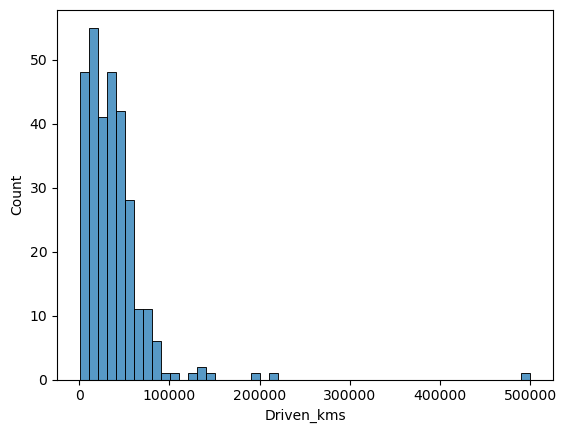

In [24]:
sns.histplot(df["Driven_kms"])

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Driven_kms', ylabel='Count'>

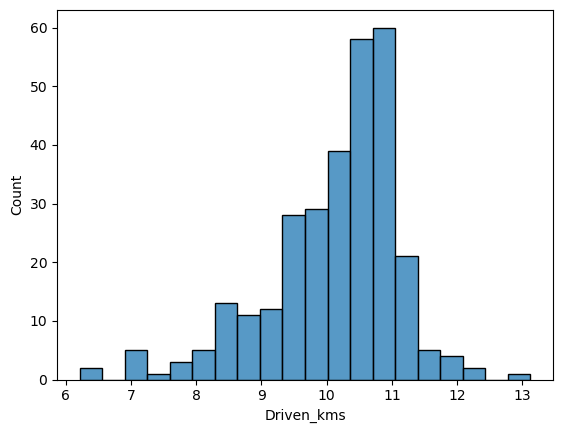

In [40]:
#after use log scale the data became similar to normal distrbition
sns.histplot(np.log(df["Driven_kms"]))

In [26]:
px.box(x=df["Driven_kms"])

In [30]:
df["Driven_kms"].quantile([0.5,0.7,0.8,0.9,0.95,0.99,0.995]).to_frame().T

,0.500,0.700,0.800,0.900,0.950,0.990,0.995
Driven_kms,32000.0,45000.0,53000.0,65600.0,80300.0,143103.52,205246.24


In [31]:
df["Driven_kms"].quantile(0.990)

143103.519999999

In [32]:
df[df.Driven_kms>=df["Driven_kms"].quantile(0.990)]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,loss
83,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0,-9.97
177,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0,-0.74
194,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0,-0.35


__NOTE:__

- There is outliers in Driven_kms

- In preprocessing process i will drop any value in Driven_kms >=143103 after that i will use log scaler with Driven_kms and use standard sacler with another numerical columns

-----------------------------------
# Conclusion

**In Prerocessing process i will do:**

1) use Binary econder to convert all catagorcial columns to numerical

2) drop any value in Driven_kms >=143103

3) use log scaler with Driven_kms and use standard sacler with another numerical columns

--------------
<a id=section2></a>
## **Business Questions**

**At this stage i will answer to following Questions :**

1) [**What are the top 10 Cars with their year' model that have highest selling price ?**](#section3)</br>

2) [**What are the top 10 Cars with their year' model that have lowest loss ?**](#section4)</br>

3) [**What is the effect of Driven_kms on the loss percentage ?**](#section5)</br>

4) [**What is the effect of Fuel_Type on the loss percentage ?**](#section6)</br>

5) [**What is the effect of Transmission on the loss percentage ?**](#section7)</br>

6) [**What is the effect of Owner on the loss percentage ?**](#section8)</br>

7) [**Conclusion**](#section9)</br>

In [51]:
# Visualization Function
def bar(data_frame,x,y,title_text,color=None):
    fig=px.bar(data_frame=data_frame,x=x,y=y,color=color, barmode='group',text_auto="0.2s")
    fig.update_traces(textfont_size=12,textposition="outside")
    fig.update_layout(title_text=title_text,title_x=0.5)
    return fig

def pie(data_frame,x,y,title_text,color=None,hole=None):
    fig=px.pie(data_frame=data_frame,names=x,values=y,color=color,hole=hole)
    fig.update_layout(title_text=title_text,title_x=0.5)
    return fig

def sunburst(data,names,path,values,title_text):
    fig=px.sunburst(data_frame=data,names=names,path=path,values=values,
               width=900,height=900)
    fig.update_traces(textinfo="label+percent parent")
    fig.update_layout(title_text=title_text,title_x=0.5)
    return fig

--------------
<a id=section3></a>
**What are the top 10 Cars with their year' model that have highest selling price ?**

In [43]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,loss
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,-2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,-4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,-2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,-1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,-2.27


In [62]:
#pandas
data=df.groupby(["Car_Name","Year"]).agg({"Selling_Price":"mean"}).reset_index().sort_values(by="Selling_Price",ascending=False).head(15)
data

,Car_Name,Year,Selling_Price
177,land cruiser,2010,35.000
153,fortuner,2017,33.000
152,fortuner,2015,23.250
172,innova,2016,20.750
173,innova,2017,20.250
151,fortuner,2014,19.370
126,corolla altis,2017,17.000
150,fortuner,2013,16.000
149,fortuner,2012,14.700
125,corolla altis,2016,14.490


In [63]:
def concat(x,y):
    return x + "_" + str(y)

data["Car_Name"]=data.apply(lambda x :concat(x.Car_Name,
                            x.Year),axis=1)
data.drop("Year",axis=1,inplace=True)
data

,Car_Name,Selling_Price
177,land cruiser_2010,35.000
153,fortuner_2017,33.000
152,fortuner_2015,23.250
172,innova_2016,20.750
173,innova_2017,20.250
151,fortuner_2014,19.370
126,corolla altis_2017,17.000
150,fortuner_2013,16.000
149,fortuner_2012,14.700
125,corolla altis_2016,14.490


In [64]:
bar(data,x="Car_Name",y="Selling_Price",
    title_text="What are the top 10 Cars with their year' model that have highest selling price ?")

__NOTE:__

- land cruiser model 2010 is the highest Selling Price

- Fortuner is one of the most frequent cars for sale, regardless of the model year

--------------
<a id=section4></a>
**What are the top 10 Cars with their year' model that have lowest loss ?**

In [74]:
#pandas
data=df.groupby(["Car_Name","Year"]).agg({"loss":"mean"}).reset_index().sort_values(by="loss",ascending=True).head(15)
data

,Car_Name,Year,loss
81,TVS Sport,2017,0.040
42,Honda Activa 4G,2017,0.045
5,Bajaj Avenger 150,2016,0.050
36,Hero Passion X pro,2016,0.050
89,Yamaha FZ S V 2.0,2017,0.060
53,Honda Dream Yuga,2017,0.060
86,Yamaha FZ 16,2015,0.070
20,Bajaj Pulsar 150,2015,0.090
2,Activa 3g,2016,0.090
39,Hero Splender iSmart,2016,0.090


In [75]:
def concat(x,y):
    return x + "_" + str(y)

data["Car_Name"]=data.apply(lambda x :concat(x.Car_Name,
                            x.Year),axis=1)
data.drop("Year",axis=1,inplace=True)
data

,Car_Name,loss
81,TVS Sport _2017,0.040
42,Honda Activa 4G_2017,0.045
5,Bajaj Avenger 150_2016,0.050
36,Hero Passion X pro_2016,0.050
89,Yamaha FZ S V 2.0_2017,0.060
53,Honda Dream Yuga _2017,0.060
86,Yamaha FZ 16_2015,0.070
20,Bajaj Pulsar 150_2015,0.090
2,Activa 3g_2016,0.090
39,Hero Splender iSmart_2016,0.090


In [77]:
bar(data,x="Car_Name",y="loss",
    title_text="What are the top 10 Cars with their year' model that have lowest loss ?")

--------------
<a id=section5></a>
**What is the effect of Driven_kms on the loss percentage ?**

In [78]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,loss
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27
...,...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2.10
295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,1.90
296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,7.65
297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,1.00


In [79]:
px.scatter(data_frame=df,x='loss',y="Driven_kms")

__NOTE:__

- There is positave relation between Driven_kms and loss, that's mean when Driven_kms incress, loss incress and Selling_Price decress

--------------
<a id=section6></a>
**What is the effect of Fuel_Type on the loss percentage ?**

In [80]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,loss
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27
...,...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2.10
295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,1.90
296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,7.65
297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,1.00


In [82]:
#pandas
data=df.groupby("Fuel_Type")["loss"].mean().reset_index()
data

,Fuel_Type,loss
0,CNG,3.315000
1,Diesel,5.543276
2,Petrol,2.319372


In [83]:
pie(data_frame=data,x="Fuel_Type",y="loss",
   title_text="What is the effect of Fuel_Type on the loss percentage ?")

__NOTE:__

- we foucs in lowest percentage in loss, that indicated to Petrol the best Fuel_Type

--------------
<a id=section7></a>
**What is the effect of Transmission on the loss percentage ?**

In [84]:
#pandas
data=df.groupby("Transmission")["loss"].mean().reset_index()
data

,Transmission,loss
0,Automatic,5.851538
1,Manual,2.516385


In [85]:
pie(data_frame=data,x="Transmission",y="loss",
   title_text="What is the effect of Transmission on the loss percentage ?")

__NOTE:__

- we foucs in lowest percentage in loss, that indicated to Manual the best Transmission

--------------
<a id=section8></a>
**What is the effect of Owner on the loss percentage ?**

In [86]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,loss
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27
...,...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2.10
295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,1.90
296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,7.65
297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,1.00


In [87]:
#pandas
data=df.groupby("Owner")["loss"].mean().reset_index()
data

,Owner,loss
0,0,2.943681
1,1,1.346000
2,3,21.230000


In [88]:
pie(data_frame=data,x="Owner",y="loss",
   title_text="What is the effect of Owner on the loss percentage ?")

__NOTE:__

- we foucs in lowest percentage in loss, that indicated to when owner =1 , get lowest loss

--------------
<a id=section9></a>
## Conclusion

**The main factor influence in loss:**

1) Driven_kms : when Driven_kms incress loss incress

2) Fuel_Type : Petrol have lowest loss percentage, sothat Petrol is the best Fuel_Type

3) Transmission :  Manual have lowest loss percentage, sothat  Manual is the best Transmission

4) Owner : owner =1 have lowest loss percentage, sothat  when owner =1 , get lowest loss

<a id=section12></a>

------------------------
# Preprocessing

**In this process i will do:**

1) drop any value in Driven_kms >=143103

2) split data

3) use Binary econder to convert all catagorcial columns to numerical

4) use log scaler with Driven_kms and use standard sacler with another numerical columns

5) create pipeline content all this process

In [90]:
df[df.Driven_kms>=143103]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,loss
83,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0,9.97
177,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0,0.74
194,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0,0.35


In [93]:
df[df.Driven_kms>=143103].index

Index([83, 177, 194], dtype='int64')

In [94]:
df.drop(df[df.Driven_kms>=143103].index,inplace=True)

In [95]:
#reset index rows after delete outliers
df.reset_index(inplace=True,drop=True)

**Split Data**

In [98]:
x,y=df.drop(["Selling_Price","loss"],axis=1),df.Selling_Price

In [99]:
x

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
291,city,2016,11.60,33988,Diesel,Dealer,Manual,0
292,brio,2015,5.90,60000,Petrol,Dealer,Manual,0
293,city,2009,11.00,87934,Petrol,Dealer,Manual,0
294,city,2017,12.50,9000,Diesel,Dealer,Manual,0


In [100]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
291     9.50
292     4.00
293     3.35
294    11.50
295     5.30
Name: Selling_Price, Length: 296, dtype: float64

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [103]:
print(f"Shape of X Train ={X_train.shape}")
print(f"Shape of y Train ={y_train.shape}")
print("*"*50)
print(f"Shape of X Test ={X_test.shape}")
print(f"Shape of y Test ={y_test.shape}")

Shape of X Train =(198, 8)
Shape of y Train =(198,)
**************************************************
Shape of X Test =(98, 8)
Shape of y Test =(98,)


**Pipeline**

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [108]:
enconder=X_train.select_dtypes(include="O").columns.tolist()
scaler=X_train.select_dtypes(exclude="O").columns.drop("Driven_kms").tolist() #drop Driven_kms to use in log scale


In [109]:
enconder

['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']

In [110]:
scaler

['Year', 'Present_Price', 'Owner']

In [113]:
# Define function to apply log transformation
def log_transform(X):
    return np.log(X)

In [129]:
steps_ct=[]#list content steps that process in only ColumnTransformer
steps=[] #list content steps that process in pipeline

steps_ct.append(("binary",BinaryEncoder(),enconder))
steps_ct.append(("scaler",StandardScaler(),scaler))
steps_ct.append(("log_scaler",FunctionTransformer(log_transform,validate=True,feature_names_out='one-to-one'),["Driven_kms"]))
steps.append(("ct",ColumnTransformer(steps_ct)))
pipline=Pipeline(steps=steps)

In [130]:
pipline

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('binary', BinaryEncoder(),
                                                  ['Car_Name', 'Fuel_Type',
                                                   'Selling_type',
                                                   'Transmission']),
                                                 ('scaler', StandardScaler(),
                                                  ['Year', 'Present_Price',
                                                   'Owner']),
                                                 ('log_scaler',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function log_transform at 0x000002427FD0E980>,
                                                                      validate=True),
                                                  ['Driven_kms'])]))])

In [131]:
pipline.fit_transform(X_train)

array([[ 0.        ,  0.        ,  0.        , ..., -0.90330443,
        -0.19310136, 10.08580911],
       [ 0.        ,  0.        ,  0.        , ..., -0.18776186,
        -0.19310136, 10.75790288],
       [ 0.        ,  0.        ,  0.        , ..., -0.03653172,
        -0.19310136, 10.4341158 ],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -0.82908964,
        -0.19310136,  9.30565055],
       [ 0.        ,  0.        ,  0.        , ...,  0.86944879,
        -0.19310136, 10.33374283],
       [ 1.        ,  0.        ,  0.        , ..., -0.70306453,
        -0.19310136,  9.98506754]])

In [133]:
#Data frame after tranform
df_tranform=pd.DataFrame(pipline.fit_transform(X_train),columns=pipline.get_feature_names_out())
df_tranform

,binary__Car_Name_0,binary__Car_Name_1,binary__Car_Name_2,binary__Car_Name_3,binary__Car_Name_4,binary__Car_Name_5,binary__Car_Name_6,binary__Fuel_Type_0,binary__Fuel_Type_1,binary__Selling_type_0,binary__Selling_type_1,binary__Transmission_0,binary__Transmission_1,scaler__Year,scaler__Present_Price,scaler__Owner,log_scaler__Driven_kms
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.819281,-0.903304,-0.193101,10.085809
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,-0.227284,-0.187762,-0.193101,10.757903
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.121571,-0.036532,-0.193101,10.434116
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,-0.227284,-0.866897,-0.193101,10.373491
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,-0.576139,-0.963516,-0.193101,11.002100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,-2.320414,-0.929910,3.282723,10.799576
194,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,-0.227284,1.570989,-0.193101,10.933125
195,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.168136,-0.829090,-0.193101,9.305651
196,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.819281,0.869449,-0.193101,10.333743


<a id=section13></a>

--------------
#  Model

In [134]:
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


In [135]:
models=[]
models.append(("Lr",LinearRegression()))
models.append(("KNN",KNeighborsRegressor()))
models.append(("DTC",DecisionTreeRegressor()))
models.append(("RF",RandomForestRegressor()))
models.append(("GB",GradientBoostingRegressor()))
models.append(("XGB",XGBRegressor()))

In [136]:
for model in models:
    steps_ct=[]#list content steps that process in only ColumnTransformer
    steps=[] #list content steps that process in pipeline

    steps_ct.append(("binary",BinaryEncoder(),enconder))
    steps_ct.append(("scaler",StandardScaler(),scaler))
    steps_ct.append(("log_scaler",FunctionTransformer(log_transform,validate=True,feature_names_out='one-to-one'),["Driven_kms"]))
    steps.append(("ct",ColumnTransformer(steps_ct)))
    steps.append(model)
    pipline=Pipeline(steps=steps)
    score=cross_validate(pipline,X_train,y_train,cv=5,scoring="r2",return_train_score=True)
    print(model[0])
    print("Training accuracy =",score["train_score"].mean())
    print("testing accuracy =",score["test_score"].mean())
    print("*"*50)

Lr
Training accuracy = 0.8988375322011072
testing accuracy = 0.852553156691733
**************************************************
KNN
Training accuracy = 0.92413766882789
testing accuracy = 0.8291707557094599
**************************************************
DTC
Training accuracy = 1.0
testing accuracy = 0.8569809924504741
**************************************************
RF
Training accuracy = 0.9879178750362595
testing accuracy = 0.9274998560252843
**************************************************
GB
Training accuracy = 0.9979774007709612
testing accuracy = 0.9487402994677598
**************************************************
XGB
Training accuracy = 0.9999998271782795
testing accuracy = 0.9549602103301906
**************************************************


**Best Model is XGBRegressor (XGB)**

In [137]:
steps_ct=[]#list content steps that process in only ColumnTransformer
steps=[] #list content steps that process in pipeline

steps_ct.append(("binary",BinaryEncoder(),enconder))
steps_ct.append(("scaler",StandardScaler(),scaler))
steps_ct.append(("log_scaler",FunctionTransformer(log_transform,validate=True,feature_names_out='one-to-one'),["Driven_kms"]))
steps.append(("ct",ColumnTransformer(steps_ct)))
steps.append(("XGB",XGBRegressor()))
pipline=Pipeline(steps=steps)

In [139]:
pipline.fit(X_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('binary', BinaryEncoder(),
                                                  ['Car_Name', 'Fuel_Type',
                                                   'Selling_type',
                                                   'Transmission']),
                                                 ('scaler', StandardScaler(),
                                                  ['Year', 'Present_Price',
                                                   'Owner']),
                                                 ('log_scaler',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function log_transform at 0x000002427FD0E980>,
                                                                      validate=True),
                                                  ['Driven_kms'])])),
                ('XGB...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [140]:
y_train_predict=pipline.predict(X_train)
y_test_predict=pipline.predict(X_test)

# Model Evaluation

In [144]:
from sklearn.metrics import r2_score
score_train=r2_score(y_train, y_train_predict)
score_test=r2_score(y_test, y_test_predict)
print(f"The Score of train = {score_train}")
print(f"The Score of test = {score_test}")

The Score of train = 0.9999996889843965
The Score of test = 0.8159931892071194
